In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


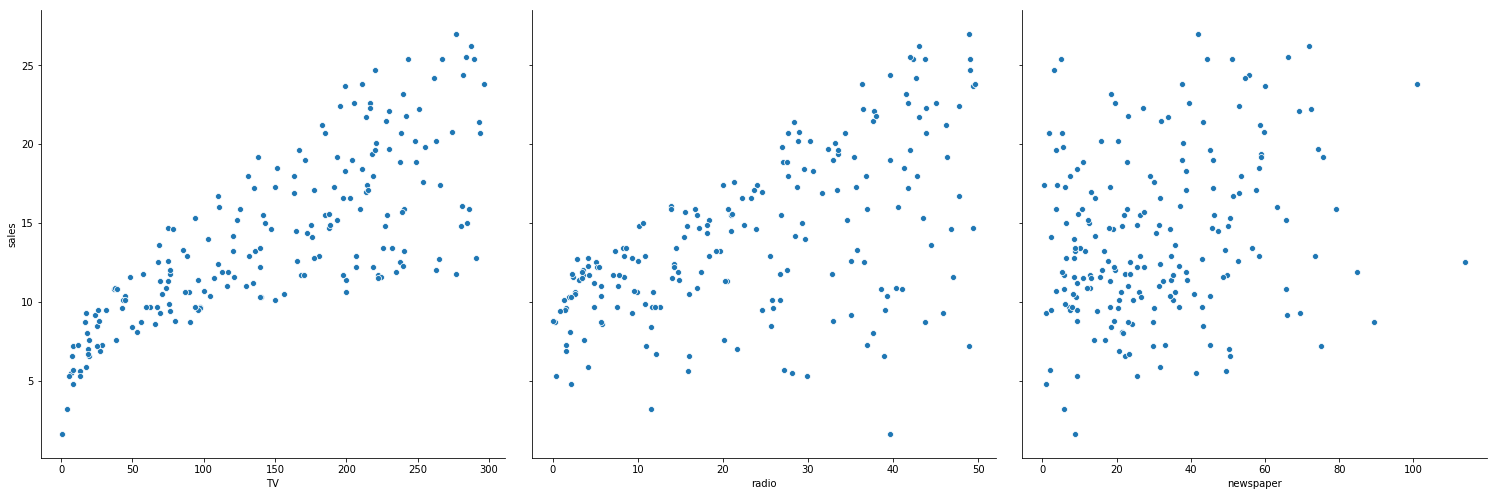

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7)

In [13]:
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]

In [11]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
Y=data['sales']
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [27]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [29]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()
lm.rsquared

0.6118750508500712

In [30]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ radio', data=data).fit()
lm.conf_int()
lm.rsquared

0.33203245544529536

In [31]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ newspaper', data=data).fit()
lm.conf_int()
lm.rsquared

0.05212044544430516